### Data preprocessing

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv('position_salaries.csv')

# features (from the second column since the first is the same as the second but as categorical)
x = dataset.iloc[:, 1:-1].values

# dependent variable (last column)
y = dataset.iloc[:, -1].values

# Reshape Y in 2d array => because when we apply StandardScale, the fit_transform method expects a 2d array
# reshape(rows, columns)
y = y.reshape(len(y),1)

### Feature scaling

In [39]:
# feature scaling for both: features and dependent variable
# Feature scaling ensures that all features and the dependent variable are on a similar scale, which helps in achieving better performance and accurate predictions

from sklearn.preprocessing import StandardScaler

# subtracts the mean from each feature and divides by the standard deviation
sc_x = StandardScaler()
sc_y = StandardScaler()

x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y)


### SVR model

In [40]:
from sklearn.svm import SVR

# train the SVR model
regressor = SVR(kernel='rbf')
regressor.fit(x, y)

# predicting a new result
single_prediction = regressor.predict(sc_x.transform([[6.5]]))
single_prediction_reshaped = single_prediction.reshape(-1,1)

# by inverse-transforming the predicted value, we obtain the original scale or unit of the dependent variable
# We do this to not have a format error
sc_y.inverse_transform(single_prediction_reshaped)



/Users/damianstone/Documents/Code/machine-learning/ML-course/venv-ML/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[170370.0204065]])

### Visualising the SVR results

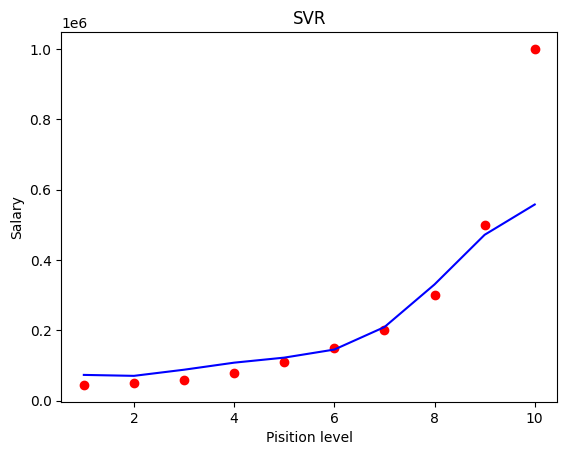

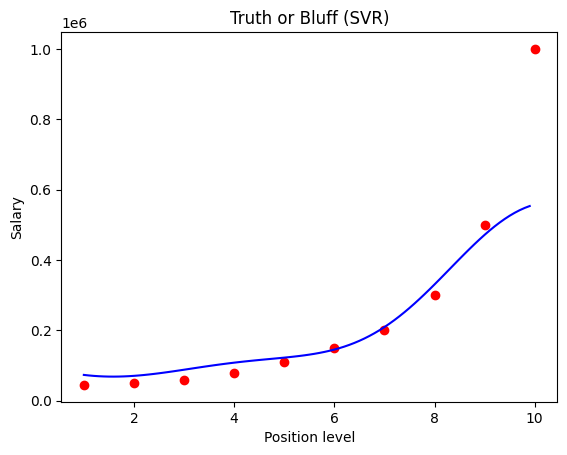

In [46]:
inverse_x = sc_x.inverse_transform(x)
inverse_y = sc_y.inverse_transform(y)

prediction = regressor.predict(x).reshape(-1,1)
inverse_prediction = sc_y.inverse_transform(prediction)

plt.scatter(inverse_x, inverse_y, color="red")
plt.plot(inverse_x, inverse_prediction, color="blue")
plt.title("SVR")
plt.xlabel("Pisition level")
plt.ylabel("Salary")
plt.show()

# Visualising the SVR results (for higher resolution and smoother curve)
X_grid = np.arange(min(sc_x.inverse_transform(x)), max(sc_x.inverse_transform(x)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), color = 'red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_x.transform(X_grid)).reshape(-1,1)), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()